# Import necessary dependencies

In [151]:
import pandas as pd


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

# my imports 
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

import random 

%matplotlib inline

# Load raw data

In [152]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
raw_data = pd.read_csv('./census-income.data', sep=',',
names = ['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household',  'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', 'fill inc questionnaire for veterans admin', 'veterans benefits', 'weeks worked in year', 'year', '???'])

# Show data

In [153]:

# If the wage is 0 then set it to None so that it is not taken into account.

raw_data['wage per hour'] = raw_data['wage per hour'].apply(lambda value: None if value == 0 else value)
raw_data.head(4)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,???
0,73,Not in universe,0,0,High school graduate,NaN,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,NaN,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,NaN,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,NaN,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


# Univariate Analysis

## Visualizing one dimension

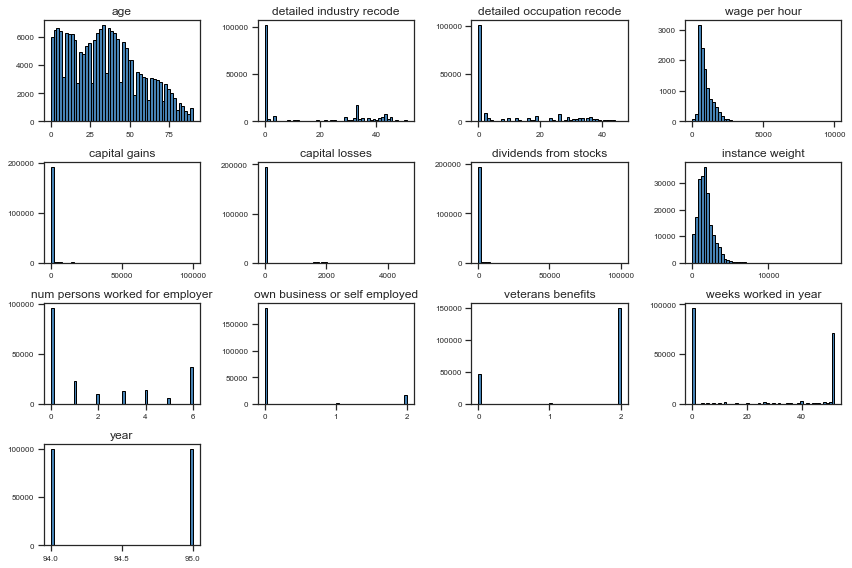

In [154]:
raw_data.hist(bins=50, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))

### Continuous, numeric attribute in 1-D

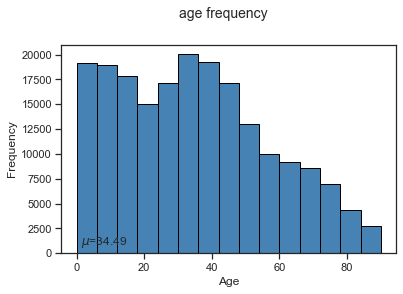

In [155]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("age frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(raw_data['age'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(raw_data['age'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

<AxesSubplot:xlabel='Age', ylabel='Density'>

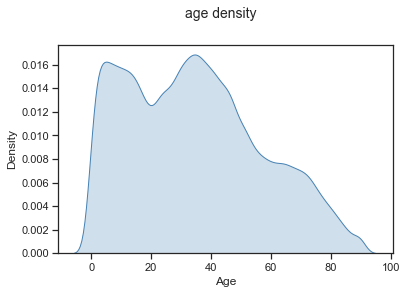

In [156]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("age density", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Age")
ax1.set_ylabel("Density") 
sns.kdeplot(raw_data['age'], ax=ax1, shade=True, color='steelblue')

### Discrete, categorical attribute in 1-D

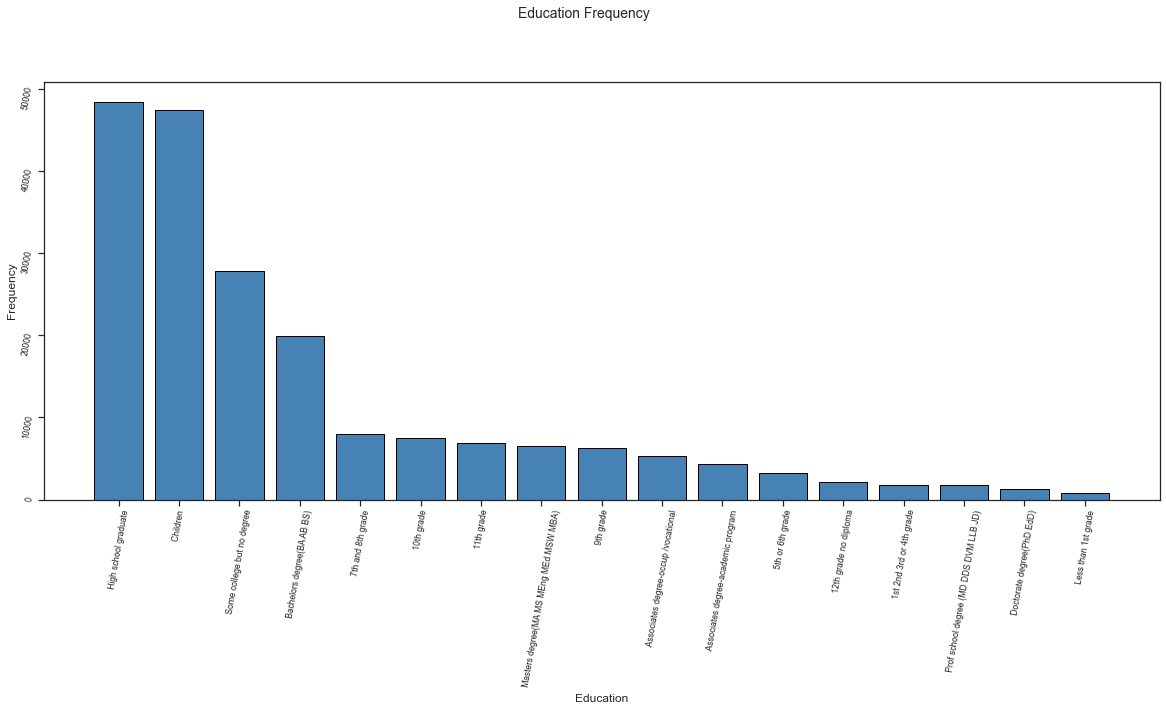

In [157]:
fig = plt.figure(figsize = (20, 8))

title = fig.suptitle("Education Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Education")
ax.set_ylabel("Frequency") 
w_q = raw_data['education'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5, rotation=80)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

# Multivariate Analysis

## Visualizing two dimensions

In [169]:
# Takes long to calculate (1m 1.6s)
# Does not visualize categorical data (i.e. only visualizes numeric data like "age" and "year")

# ---------------------------------------------------------------------------------------------------------

# cols = ['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household',  'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', 'fill inc questionnaire for veterans admin', 'veterans benefits', 'weeks worked in year', 'year']

# pp = sns.pairplot(raw_data[cols], height=1.8, aspect=1.8, 
#                   palette={"red": "#FF9999", "white": "#FFE888"},
#                   plot_kws=dict(edgecolor="black", linewidth=0.5))
# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

# Analysing "wage per hour"

### "wage per hour" / "major industry code" ... (with outliers)

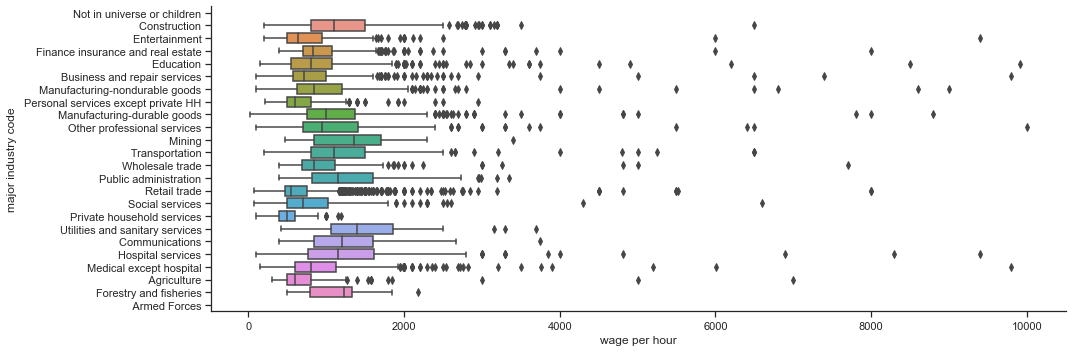

In [159]:
sns.catplot(x="wage per hour", y="major industry code", kind="box", data=raw_data,  aspect=3, showfliers = True)

### "wage per hour" / "major industry code" ... (no outliers)

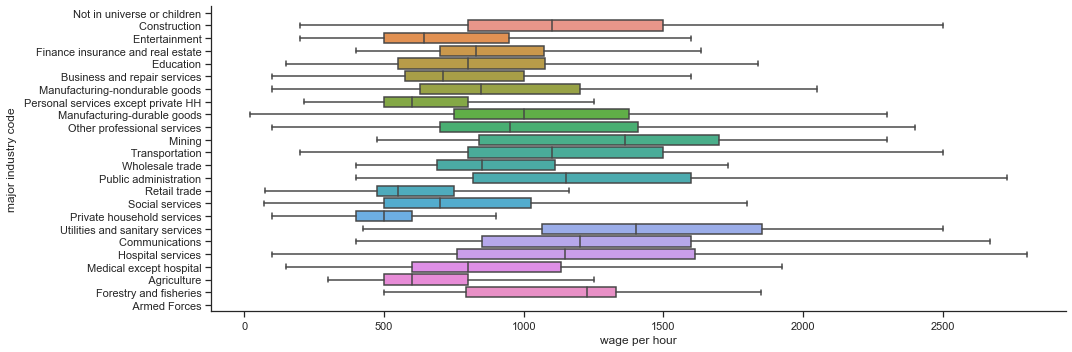

In [160]:
sns.catplot(x="wage per hour", y="major industry code", kind="box", data=raw_data, aspect=3,  showfliers = False)

### "wage per hour" / "major occupation code" ... (no outliers)

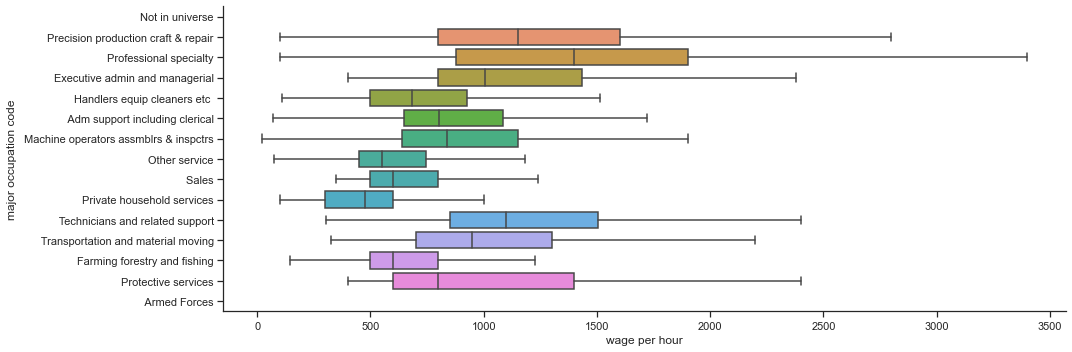

In [161]:
sns.catplot(x="wage per hour", y="major occupation code", kind="box", data=raw_data, aspect=3,  showfliers = False)


### "wage per hour" / "race" ... (no outliers)

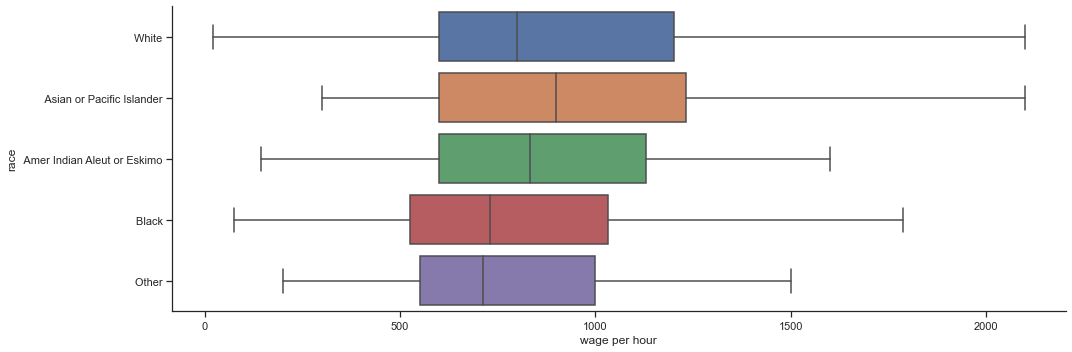

In [162]:
sns.catplot(x="wage per hour", y="race", kind="box", data=raw_data, aspect=3,  showfliers = False)

### "wage per hour" / "class of worker" ... (with outliers)

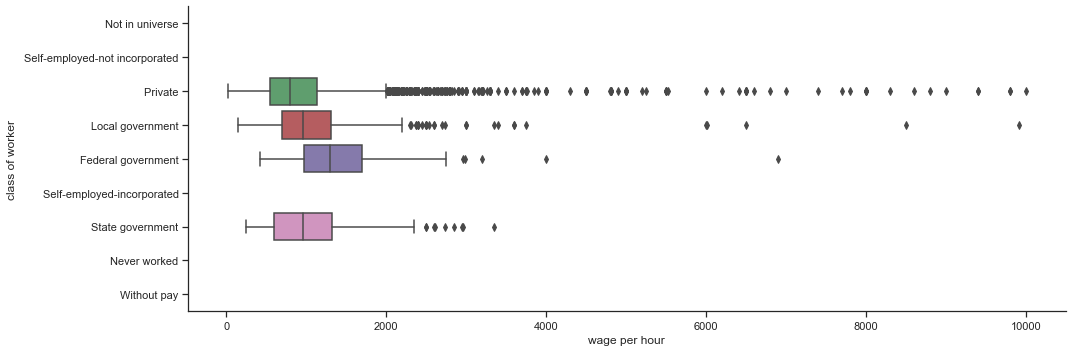

In [163]:
sns.catplot(x="wage per hour", y="class of worker", kind="box", data=raw_data,  aspect=3, showfliers = True)

### "wage per hour" / "class of worker" ... (no outliers)

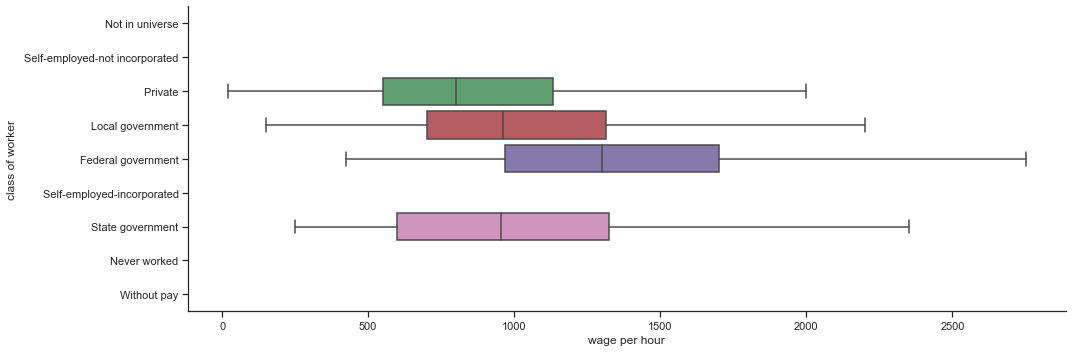

In [164]:
sns.catplot(x="wage per hour", y="class of worker", kind="box", data=raw_data,  aspect=3, showfliers = False)

### "wage per hour" / "education" ... (with outliers)

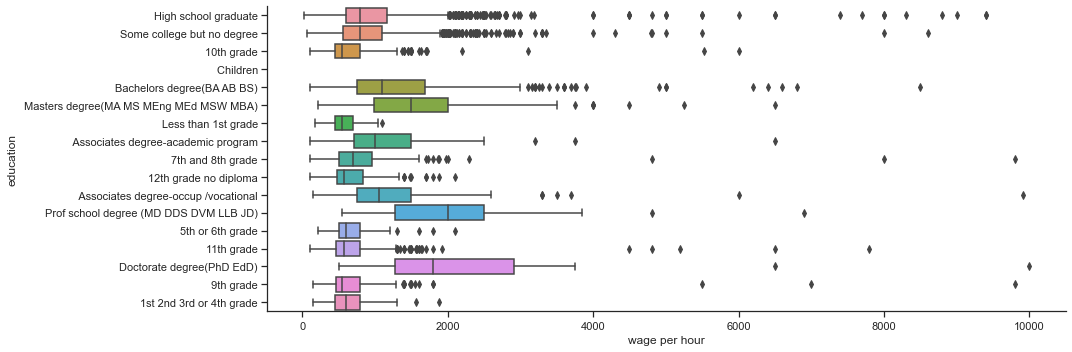

In [165]:
sns.catplot(x="wage per hour", y="education", kind="box", data=raw_data,  aspect=3, showfliers = True)

### "wage per hour" / "education" ... (no outliers)

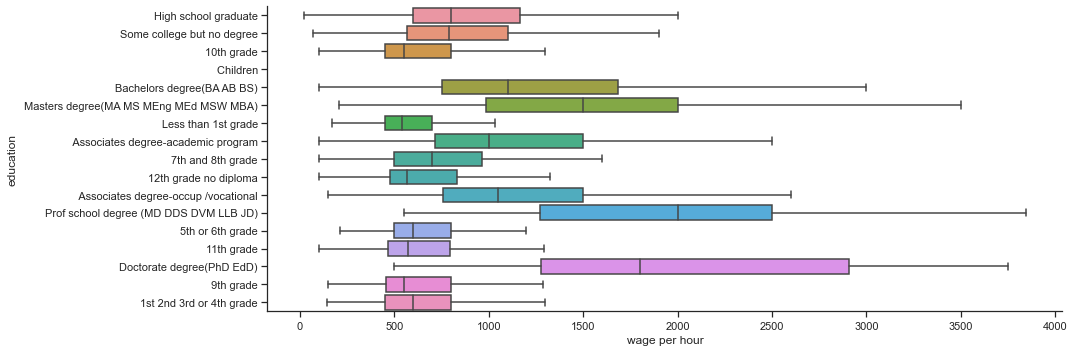

In [166]:
sns.catplot(x="wage per hour", y="education", kind="box", data=raw_data,  aspect=3, showfliers = False)

### "wage per hour" / "sex" ... (with outliers)

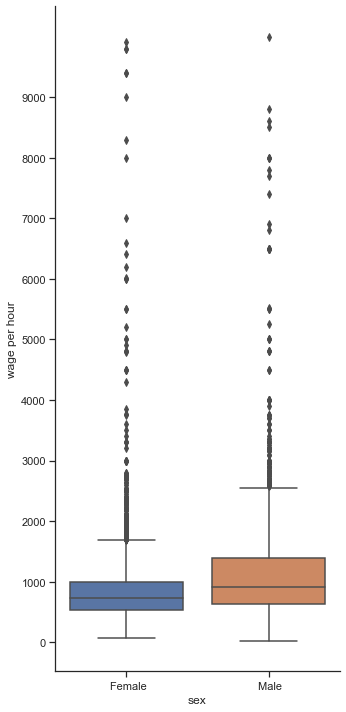

In [167]:
g = sns.catplot(x="sex", y="wage per hour", kind="box", data=raw_data, aspect=0.5, height=10, showfliers = True)
myYTickInterval = []

for x in range(10):
    myYTickInterval.append(x * 1000)

g.set(yticks=myYTickInterval)

### "wage per hour" / "sex" ... (not outliers)

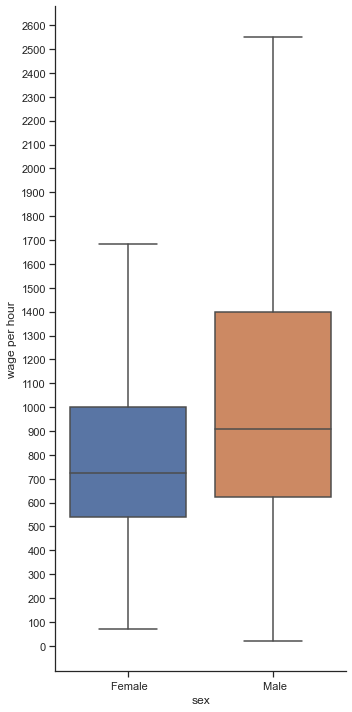

In [168]:
g = sns.catplot(x="sex", y="wage per hour", kind="box", data=raw_data, aspect=0.5, height=10, showfliers = False)
myYTickInterval = []

for x in range(27):
    myYTickInterval.append(x * 100)

g.set(yticks=myYTickInterval)